In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the data
demographic_df=pd.read_csv('Demographic_data.csv')
credit_bureau_df=pd.read_csv('Credit_Bureau_data.csv')

In [4]:
#Demographic Data
demographic_df.head(10)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0
5,312196805,20,M,Married,1.0,39.0,Bachelor,SAL,NaN,116,52,0.0
6,532217204,42,M,Married,2.0,55.0,Professional,SAL,Rented,104,41,0.0
7,74788849,34,M,Married,2.0,49.0,Masters,SE_PROF,Rented,108,40,0.0
8,782743811,30,M,Married,3.0,48.0,Phd,SAL,Rented,115,58,0.0
9,96964957,22,M,Single,1.0,38.0,Bachelor,SE_PROF,Rented,111,57,0.0


In [5]:
demographic_df.shape

(71295, 12)

In [6]:
# Dropping duplicates - No duplicates
demographic_df = demographic_df.drop_duplicates()

In [7]:
# 3 duplicate application ID is present
demographic_df['Application ID'].nunique()

71292

In [8]:
# Removing duplicate application ID
demographic_df = demographic_df.drop_duplicates(['Application ID'])

In [9]:
demographic_df.shape

(71292, 12)

In [10]:
demographic_df.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [11]:
demographic_df.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129200e+04,71292.000000,71289.000000,71292.000000,71292.000000,71292.000000,69867.000000
mean,4.989518e+08,44.943037,2.865126,27.195758,34.563570,33.957976,0.042180
std,2.885936e+08,9.939266,1.382312,15.514524,36.760345,20.410377,0.201001
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483706e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975655e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495782e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [12]:
# View of Credit Bureau Data
credit_bureau_df.head(10)

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0
5,312196805,0,0,0,0,0,0,10.0,0.0,0,0,0,0,0,0.0,2569.0,1,0,0.0
6,532217204,0,0,0,0,0,0,11.0,0.0,1,0,0,0,0,1.0,3005535.0,4,0,0.0
7,74788849,0,0,0,0,0,0,13.0,1.0,1,0,0,0,0,1.0,3004790.0,3,0,0.0
8,782743811,0,0,0,0,0,1,9.0,0.0,0,0,0,0,0,1.0,3007428.0,2,0,0.0
9,96964957,0,0,0,0,0,0,6.0,1.0,1,0,0,0,0,0.0,170860.0,1,1,0.0


In [13]:
credit_bureau_df.shape

(71295, 19)

In [14]:
# Dropping duplicates - No duplicates
credit_bureau_df = credit_bureau_df.drop_duplicates()

In [15]:
# 3 duplicate application ID is present
credit_bureau_df['Application ID'].nunique()

71292

In [16]:
# Removing 3 duplicate application ID
credit_bureau_df = credit_bureau_df.drop_duplicates(['Application ID'])

In [17]:
credit_bureau_df.shape

(71292, 19)

In [18]:
credit_bureau_df.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [19]:
credit_bureau_df.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129200e+04,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,70234.000000,71291.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,71020.000000,7.102000e+04,71292.000000,71292.000000,69867.000000
mean,4.989518e+08,0.270311,0.430525,0.577190,0.450331,0.655459,0.800875,29.695347,2.298060,5.826923,1.206924,2.397450,1.763550,3.535221,0.256435,1.249195e+06,8.186711,0.084624,0.042180
std,2.885936e+08,0.534168,0.825344,1.074442,0.808380,1.089532,1.331932,29.531665,2.070227,5.065188,1.352956,2.420112,1.971331,3.582261,0.436668,1.278889e+06,7.090915,0.278323,0.201001
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483706e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115370e+05,3.000000,0.000000,0.000000
50%,4.975655e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749945e+05,6.000000,0.000000,0.000000
75%,7.495782e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920797e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [20]:
# Same performance Tag is available in credit bureau data also, so deleting this column
credit_bureau_df = credit_bureau_df.drop(columns = ['Performance Tag'])

In [21]:
# Merge the demographic and credit bureau data
data=pd.merge(demographic_df,credit_bureau_df,on='Application ID',how='inner')
data.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,1.0,2,0,0,0,0,1.0,2999395.0,4,0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,1.0,2,0,0,0,0,0.0,3078.0,5,0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0.0,0,0,0,0,0,1.0,3004972.0,2,0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1.0,1,0,0,0,0,1.0,3355373.0,4,1
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,0.0,1,0,0,0,0,1.0,3014283.0,4,0


In [22]:
data.shape

(71292, 29)

# DATA CLEANING & EDA

In [23]:
demographic_df['Gender'].describe()

count     71290
unique        2
top           M
freq      54453
Name: Gender, dtype: object

In [24]:
demographic_df['Marital Status (at the time of application)'].describe()

count       71286
unique          2
top       Married
freq        60727
Name: Marital Status (at the time of application), dtype: object

In [25]:
demographic_df['Marital Status (at the time of application)'].value_counts()

Married    60727
Single     10559
Name: Marital Status (at the time of application), dtype: int64

In [26]:
demographic_df['Marital Status (at the time of application)'].astype('category').value_counts()

Married    60727
Single     10559
Name: Marital Status (at the time of application), dtype: int64

In [27]:
demographic_df['No of dependents'].value_counts()

3.0    16279
1.0    15387
2.0    15289
4.0    12220
5.0    12114
Name: No of dependents, dtype: int64

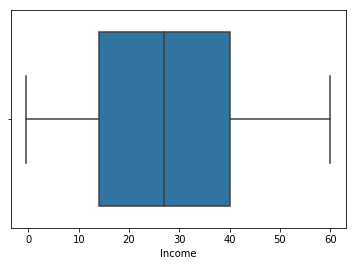

In [28]:
sns.boxplot(x='Income',data=data)
plt.show()

In [29]:
demographic_df['Education'].astype('category').value_counts()

Professional    24837
Masters         23970
Bachelor        17697
Phd              4548
Others            121
Name: Education, dtype: int64

In [30]:
demographic_df['Profession '].astype('category').value_counts()

SAL        40438
SE_PROF    16535
SE         14305
Name: Profession , dtype: int64

In [31]:
demographic_df['Type of residence'].astype('category').value_counts()

Rented                 53394
Owned                  14243
Living with Parents     1818
Company provided        1630
Others                   199
Name: Type of residence, dtype: int64

In [32]:
df_not_num = data.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 5 non numerical features including:
['Gender', 'Marital Status (at the time of application)', 'Education', 'Profession ', 'Type of residence']


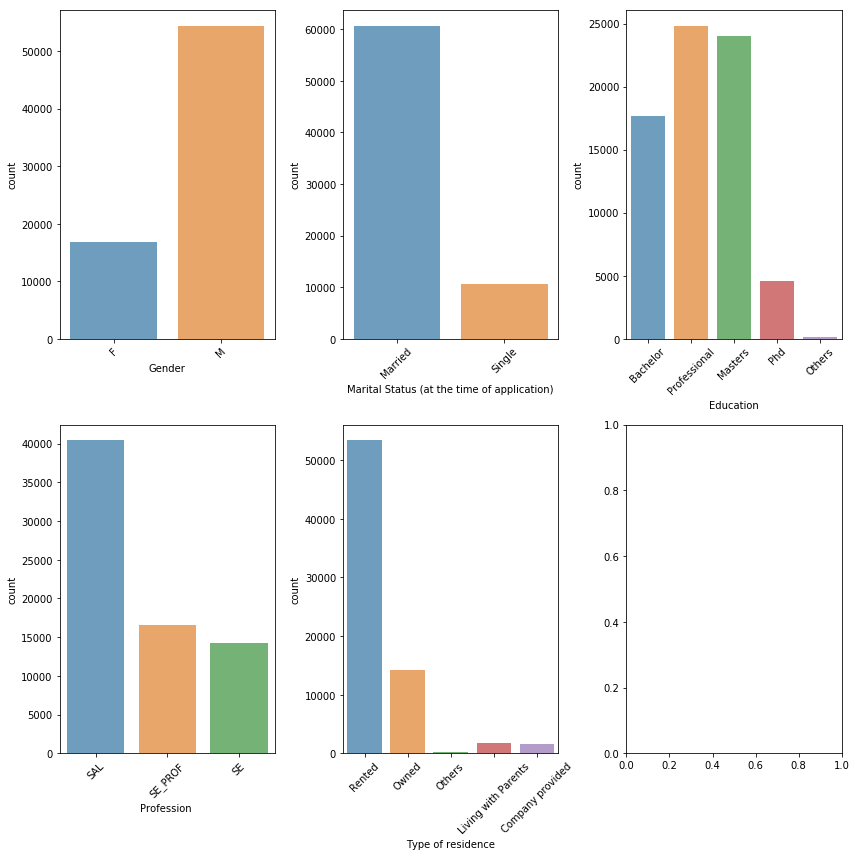

In [33]:
# EDA for Categorical Variables

fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 12))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

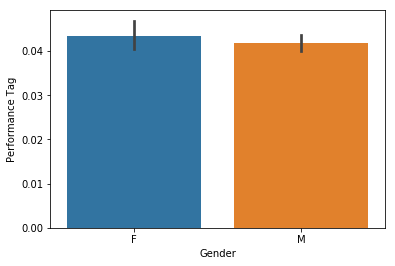

In [34]:
sns.barplot(x='Gender', y='Performance Tag', data=data)

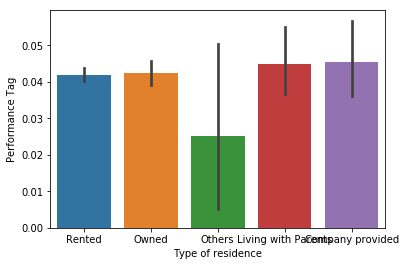

In [35]:
sns.barplot(x='Type of residence', y='Performance Tag', data=data)

### AGE 

In [36]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,data['Age'].max() + 10, 10)
data['age_bins'] = pd.cut(data['Age'], bins, include_lowest=True)
No_of_prospect = data.groupby('age_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('age_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",121,3,2.5
1,"(20.0, 30.0]",5807,238,4.1
2,"(30.0, 40.0]",18688,830,4.4
3,"(40.0, 50.0]",22872,958,4.2
4,"(50.0, 60.0]",17534,718,4.1
5,"(60.0, 70.0]",4825,200,4.1


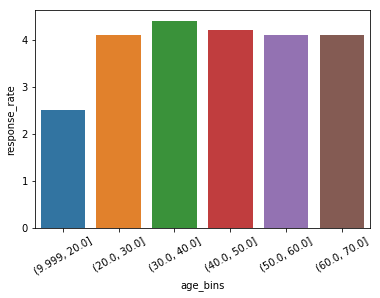

In [37]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

### NO OF DEPENDENTS

In [38]:
data['No of dependents'].value_counts()

3.0    16279
1.0    15387
2.0    15289
4.0    12220
5.0    12114
Name: No of dependents, dtype: int64

In [39]:
No_of_prospect = data.groupby('No of dependents')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('No of dependents')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_no_depen = No_of_prospect.merge(count_prospects, on='No of dependents')
agg_no_depen['response_rate'] = 100*(agg_no_depen['count_prospects']/agg_no_depen['No.of_prospect']).round(3)
agg_no_depen

,No of dependents,No.of_prospect,count_prospects,response_rate
0,1.0,15218,667,4.4
1,2.0,15128,588,3.9
2,3.0,15645,695,4.4
3,4.0,11998,494,4.1
4,5.0,11875,503,4.2


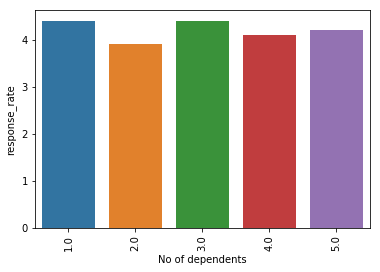

In [40]:
ax = sns.barplot(x='No of dependents', y='response_rate', data=agg_no_depen)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### INCOME

In [41]:
bins = np.arange(10,data['Income'].max() + 10, 10)
data['Income_bins'] = pd.cut(data['Income'], bins, include_lowest=True)
No_of_prospect = data.groupby('Income_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('Income_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')
Income_age = No_of_prospect.merge(count_prospects, on='Income_bins')
Income_age['response_rate'] = 100*(Income_age['count_prospects']/Income_age['No.of_prospect']).round(3)
Income_age

,Income_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",14684,683,4.7
1,"(20.0, 30.0]",13587,601,4.4
2,"(30.0, 40.0]",13635,484,3.5
3,"(40.0, 50.0]",10844,384,3.5
4,"(50.0, 60.0]",5612,161,2.9


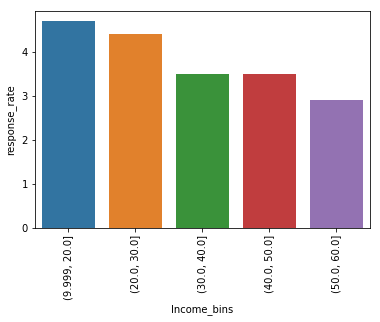

In [42]:
ax = sns.barplot(x='Income_bins', y='response_rate', data=Income_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Education

In [43]:
data['Education'].value_counts()

Professional    24837
Masters         23970
Bachelor        17697
Phd              4548
Others            121
Name: Education, dtype: int64

In [44]:
No_of_prospect = data.groupby('Education')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('Education')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_edu = No_of_prospect.merge(count_prospects, on='Education')
agg_edu['response_rate'] = 100*(agg_edu['count_prospects']/agg_edu['No.of_prospect']).round(3)
agg_edu

,Education,No.of_prospect,count_prospects,response_rate
0,Bachelor,17302,742,4.3
1,Masters,23481,998,4.3
2,Others,119,8,6.7
3,Phd,4463,183,4.1
4,Professional,24384,1011,4.1


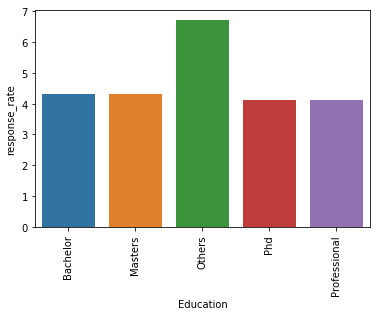

In [45]:
ax = sns.barplot(x='Education', y='response_rate', data=agg_edu)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Type of residence

In [46]:
data['Type of residence'].value_counts()

Rented                 53394
Owned                  14243
Living with Parents     1818
Company provided        1630
Others                   199
Name: Type of residence, dtype: int64

In [47]:
No_of_prospect = data.groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='Type of residence')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,Type of residence,No.of_prospect,count_prospects,response_rate
0,Company provided,1603,73,4.6
1,Living with Parents,1778,80,4.5
2,Others,198,5,2.5
3,Owned,14003,593,4.2
4,Rented,52277,2196,4.2


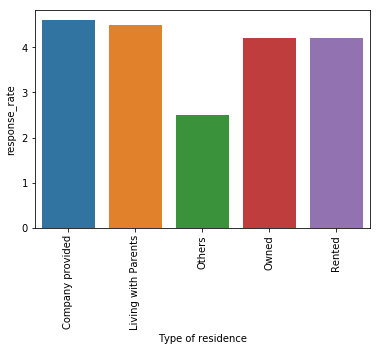

In [48]:
ax = sns.barplot(x='Type of residence', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Profession

In [49]:
data['Profession '].value_counts()

SAL        40438
SE_PROF    16535
SE         14305
Name: Profession , dtype: int64

In [50]:
No_of_prospect = data.groupby('Profession ')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('Profession ')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_prof = No_of_prospect.merge(count_prospects, on='Profession ')
agg_prof['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_prof

,Profession,No.of_prospect,count_prospects,response_rate
0,SAL,39673,1629,4.6
1,SE,13925,641,4.5
2,SE_PROF,16256,677,2.5


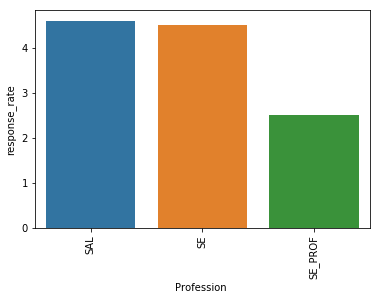

In [51]:
ax = sns.barplot(x='Profession ', y='response_rate', data=agg_prof)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of months in current residence

In [52]:
bins = np.arange(10,data['No of months in current residence'].max() + 10, 10)
data['res_bins'] = pd.cut(data['No of months in current residence'], bins, include_lowest=True)
No_of_prospect = data.groupby('res_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('res_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='res_bins')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,res_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",4166,287,6.9
1,"(20.0, 30.0]",3482,229,6.6
2,"(30.0, 40.0]",3524,200,5.7
3,"(40.0, 50.0]",3298,178,5.4
4,"(50.0, 60.0]",3167,168,5.3
5,"(60.0, 70.0]",2907,129,4.4
6,"(70.0, 80.0]",2821,137,4.9
7,"(80.0, 90.0]",2742,126,4.6
8,"(90.0, 100.0]",2782,119,4.3
9,"(100.0, 110.0]",2889,108,3.7


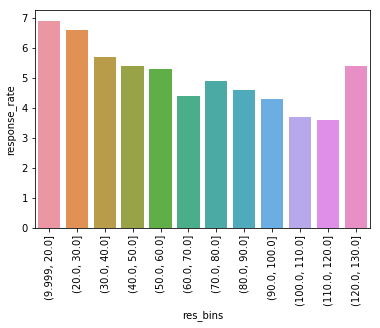

In [53]:
ax = sns.barplot(x='res_bins', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [54]:
data.drop(['age_bins','Income_bins','res_bins'], axis=1, inplace = True)

### Total No of Trades

In [55]:
bins = np.arange(10,data['Total No of Trades'].max() + 10, 10)
data['total_bin'] = pd.cut(data['Total No of Trades'], bins, include_lowest=True, )
No_of_prospect = data.groupby('total_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('total_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='total_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,total_bin,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",12317,781,6.3
1,"(20.0, 30.0]",5915,233,3.9
2,"(30.0, 40.0]",898,37,4.1
3,"(40.0, 50.0]",5,0,0.0


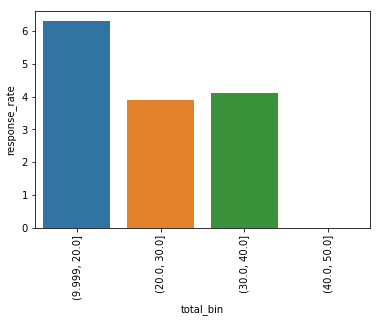

In [56]:
ax = sns.barplot(x='total_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Outstanding Balance

In [57]:
bins = np.arange(10,data['Outstanding Balance'].max() + 10, 200000)
data['out_bin'] = pd.cut(data['Outstanding Balance'], bins, include_lowest=True, )
No_of_prospect = data.groupby('out_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('out_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='out_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,out_bin,No.of_prospect,count_prospects,response_rate
0,"(9.999, 200010.0]",15402,287,1.9
1,"(200010.0, 400010.0]",5660,241,4.3
2,"(400010.0, 600010.0]",7121,395,5.5
3,"(600010.0, 800010.0]",7763,500,6.4
4,"(800010.0, 1000010.0]",6466,392,6.1
5,"(1000010.0, 1200010.0]",4171,290,7.0
6,"(1200010.0, 1400010.0]",2161,106,4.9
7,"(1400010.0, 1600010.0]",1117,48,4.3
8,"(1600010.0, 1800010.0]",526,28,5.3
9,"(1800010.0, 2000010.0]",222,6,2.7


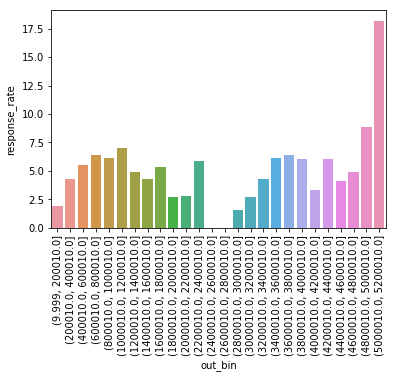

In [58]:
ax = sns.barplot(x='out_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of Inquiries in last 12 months (excluding home & auto loans)

In [59]:
bins = np.arange(0,data['No of Inquiries in last 12 months (excluding home & auto loans)'].max() + 10, 5)
data['inq_12_bin'] = pd.cut(data['No of Inquiries in last 12 months (excluding home & auto loans)'], bins, include_lowest=True)
No_of_prospect = data.groupby('inq_12_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('inq_12_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='inq_12_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,inq_12_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 5.0]",53405,2029,3.8
1,"(5.0, 10.0]",12236,752,6.1
2,"(10.0, 15.0]",3869,154,4.0
3,"(15.0, 20.0]",357,12,3.4
4,"(20.0, 25.0]",0,0,NaN


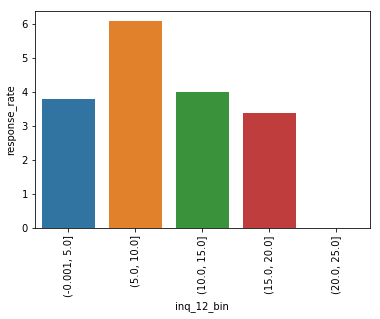

In [60]:
ax = sns.barplot(x='inq_12_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of Inquiries in last 6 months (excluding home & auto loans)

In [61]:
bins = np.arange(0,data['No of Inquiries in last 6 months (excluding home & auto loans)'].max() + 10, 5)
data['inq_6_bin'] = pd.cut(data['No of Inquiries in last 6 months (excluding home & auto loans)'], bins, include_lowest=True)
No_of_prospect = data.groupby('inq_6_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('inq_6_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='inq_6_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,inq_6_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 5.0]",65600,2786,4.2
1,"(5.0, 10.0]",4267,161,3.8
2,"(10.0, 15.0]",0,0,NaN


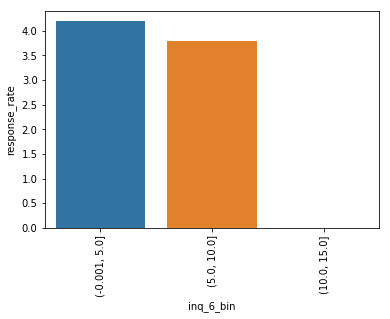

In [62]:
ax = sns.barplot(x='inq_6_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of PL trades opened in last 12 months

In [63]:
bins = np.arange(0,data['No of PL trades opened in last 12 months'].max() + 10, 5)
data['pl_12_bin'] = pd.cut(data['No of PL trades opened in last 12 months'], bins, include_lowest=True)
No_of_prospect = data.groupby('pl_12_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('pl_12_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='pl_12_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,pl_12_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 5.0]",61517,2503,4.1
1,"(5.0, 10.0]",8274,440,5.3
2,"(10.0, 15.0]",76,4,5.3
3,"(15.0, 20.0]",0,0,NaN


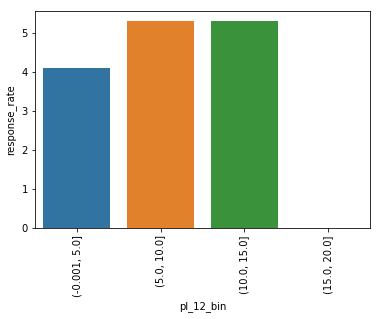

In [64]:
ax = sns.barplot(x='pl_12_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of PL trades opened in last 6 months

In [65]:
bins = np.arange(0,data['No of PL trades opened in last 6 months'].max() + 10, 5)
data['pl_6_bin'] = pd.cut(data['No of PL trades opened in last 6 months'], bins, include_lowest=True)
No_of_prospect = data.groupby('pl_6_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('pl_6_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='pl_6_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,pl_6_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 5.0]",69571,2939,4.2
1,"(5.0, 10.0]",296,8,2.7
2,"(10.0, 15.0]",0,0,NaN


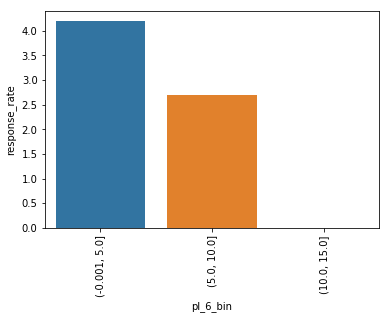

In [66]:
ax = sns.barplot(x='pl_6_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of trades opened in last 12 months

In [67]:
bins = np.arange(0,data['No of trades opened in last 12 months'].max() + 10, 10)
data['t_12_bin'] = pd.cut(data['No of trades opened in last 12 months'], bins, include_lowest=True)
No_of_prospect = data.groupby('t_12_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('t_12_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='t_12_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,t_12_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 10.0]",58019,2358,4.1
1,"(10.0, 20.0]",11071,560,5.1
2,"(20.0, 30.0]",777,29,3.7


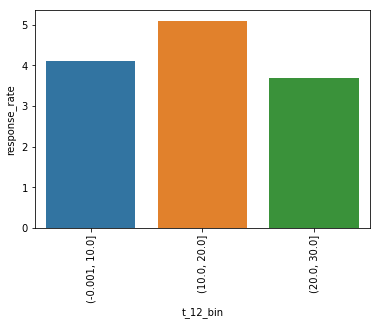

In [68]:
ax = sns.barplot(x='t_12_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of trades opened in last 6 months

In [69]:
bins = np.arange(0,data['No of trades opened in last 6 months'].max() + 10, 5)
data['t_6_bin'] = pd.cut(data['No of trades opened in last 6 months'], bins, include_lowest=True)
No_of_prospect = data.groupby('t_6_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('t_6_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='t_6_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,t_6_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 5.0]",63795,2691,4.2
1,"(5.0, 10.0]",5995,254,4.2
2,"(10.0, 15.0]",76,2,2.6
3,"(15.0, 20.0]",0,0,NaN


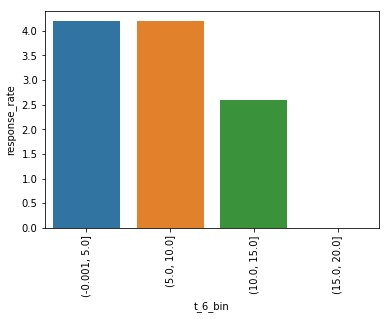

In [70]:
ax = sns.barplot(x='t_6_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of times 30 DPD or worse in last 12 months

In [71]:
bins = np.arange(0,data['No of times 30 DPD or worse in last 12 months'].max() + 10, 5)
data['dpd_30_12_bin'] = pd.cut(data['No of times 30 DPD or worse in last 12 months'], bins, include_lowest=True)
No_of_prospect = data.groupby('dpd_30_12_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('dpd_30_12_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='dpd_30_12_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,dpd_30_12_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 5.0]",69360,2896,4.2
1,"(5.0, 10.0]",507,51,10.1
2,"(10.0, 15.0]",0,0,NaN


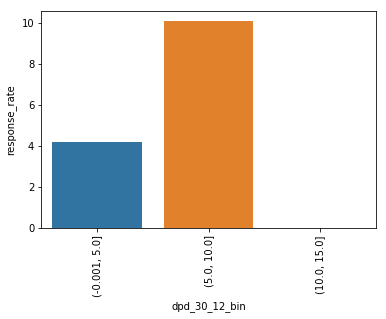

In [72]:
ax = sns.barplot(x='dpd_30_12_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of times 60 DPD or worse in last 12 months

In [73]:
bins = np.arange(0,data['No of times 60 DPD or worse in last 12 months'].max() + 10, 5)
data['dpd_60_12_bin'] = pd.cut(data['No of times 60 DPD or worse in last 12 months'], bins, include_lowest=True)
No_of_prospect = data.groupby('dpd_60_12_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('dpd_60_12_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='dpd_60_12_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,dpd_60_12_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 5.0]",69749,2934,4.2
1,"(5.0, 10.0]",118,13,11.0
2,"(10.0, 15.0]",0,0,NaN


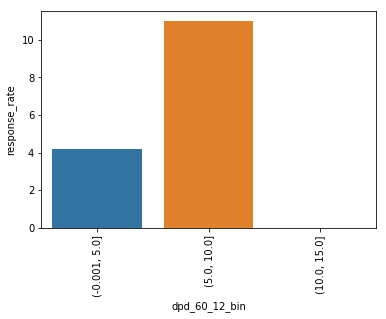

In [74]:
ax = sns.barplot(x='dpd_60_12_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of times 90 DPD or worse in last 12 months

In [75]:
bins = np.arange(0,data['No of times 90 DPD or worse in last 12 months'].max() + 10, 5)
data['dpd_90_12_bin'] = pd.cut(data['No of times 90 DPD or worse in last 12 months'], bins, include_lowest=True)
No_of_prospect = data.groupby('dpd_90_12_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('dpd_90_12_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='dpd_90_12_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,dpd_90_12_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 5.0]",69867,2947,4.2
1,"(5.0, 10.0]",0,0,NaN


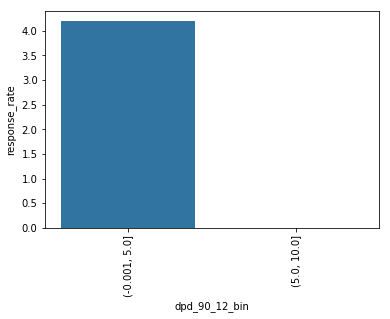

In [76]:
ax = sns.barplot(x='dpd_90_12_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of times 90 DPD or worse in last 6 months

In [77]:
bins = np.arange(0,data['No of times 90 DPD or worse in last 6 months'].max() + 10, 5)
data['dpd_90_6_bin'] = pd.cut(data['No of times 90 DPD or worse in last 6 months'], bins, include_lowest=True)
No_of_prospect = data.groupby('dpd_90_6_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('dpd_90_6_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='dpd_90_6_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,dpd_90_6_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 5.0]",69867,2947,4.2
1,"(5.0, 10.0]",0,0,NaN


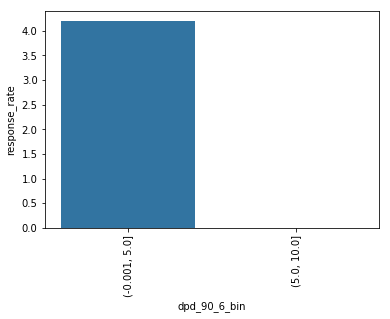

In [78]:
ax = sns.barplot(x='dpd_90_6_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of times 60 DPD or worse in last 6 months

In [79]:
bins = np.arange(0,data['No of times 60 DPD or worse in last 6 months'].max() + 10, 5)
data['dpd_60_6_bin'] = pd.cut(data['No of times 60 DPD or worse in last 6 months'], bins, include_lowest=True)
No_of_prospect = data.groupby('dpd_60_6_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('dpd_60_6_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='dpd_60_6_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,dpd_60_6_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 5.0]",69867,2947,4.2
1,"(5.0, 10.0]",0,0,NaN


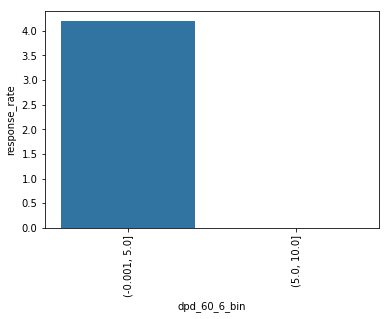

In [80]:
ax = sns.barplot(x='dpd_60_6_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### No of times 30 DPD or worse in last 6 months

In [81]:
bins = np.arange(0,data['No of times 30 DPD or worse in last 6 months'].max() + 10, 5)
data['dpd_30_6_bin'] = pd.cut(data['No of times 30 DPD or worse in last 6 months'], bins, include_lowest=True)
No_of_prospect = data.groupby('dpd_30_6_bin')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = data[data['Performance Tag']==1].groupby('dpd_30_6_bin')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_res = No_of_prospect.merge(count_prospects, on='dpd_30_6_bin')
agg_res['response_rate'] = 100*(agg_res['count_prospects']/agg_res['No.of_prospect']).round(3)
agg_res

,dpd_30_6_bin,No.of_prospect,count_prospects,response_rate
0,"(-0.001, 5.0]",69756,2938,4.2
1,"(5.0, 10.0]",111,9,8.1
2,"(10.0, 15.0]",0,0,NaN


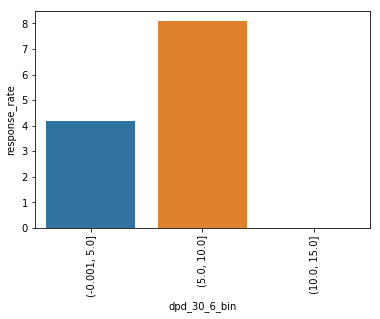

In [82]:
ax = sns.barplot(x='dpd_30_6_bin', y='response_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [83]:
data.drop(['dpd_30_6_bin','dpd_60_6_bin','dpd_90_6_bin', 'dpd_30_12_bin', 'dpd_60_12_bin', 'dpd_90_12_bin', 't_6_bin', 't_12_bin', 'pl_6_bin','pl_12_bin','inq_6_bin','inq_12_bin','out_bin','total_bin'], axis=1, inplace = True)

### Numerical data distribution

In [84]:
list(set(data.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [85]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,954457215,48,2.0,40.0,113,56,0.0,0,0,0,...,1.0,2,0,0,0,0,1.0,2999395.0,4,0
1,432830445,31,4.0,55.0,112,46,0.0,0,0,0,...,1.0,2,0,0,0,0,0.0,3078.0,5,0
2,941387308,32,2.0,46.0,104,49,0.0,0,0,0,...,0.0,0,0,0,0,0,1.0,3004972.0,2,0
3,392161677,43,1.0,53.0,94,53,0.0,0,0,0,...,1.0,1,0,0,0,0,1.0,3355373.0,4,1
4,182011211,35,5.0,44.0,112,43,0.0,0,0,0,...,0.0,1,0,0,0,0,1.0,3014283.0,4,0


### Now lets plot all numerical variables distribution:

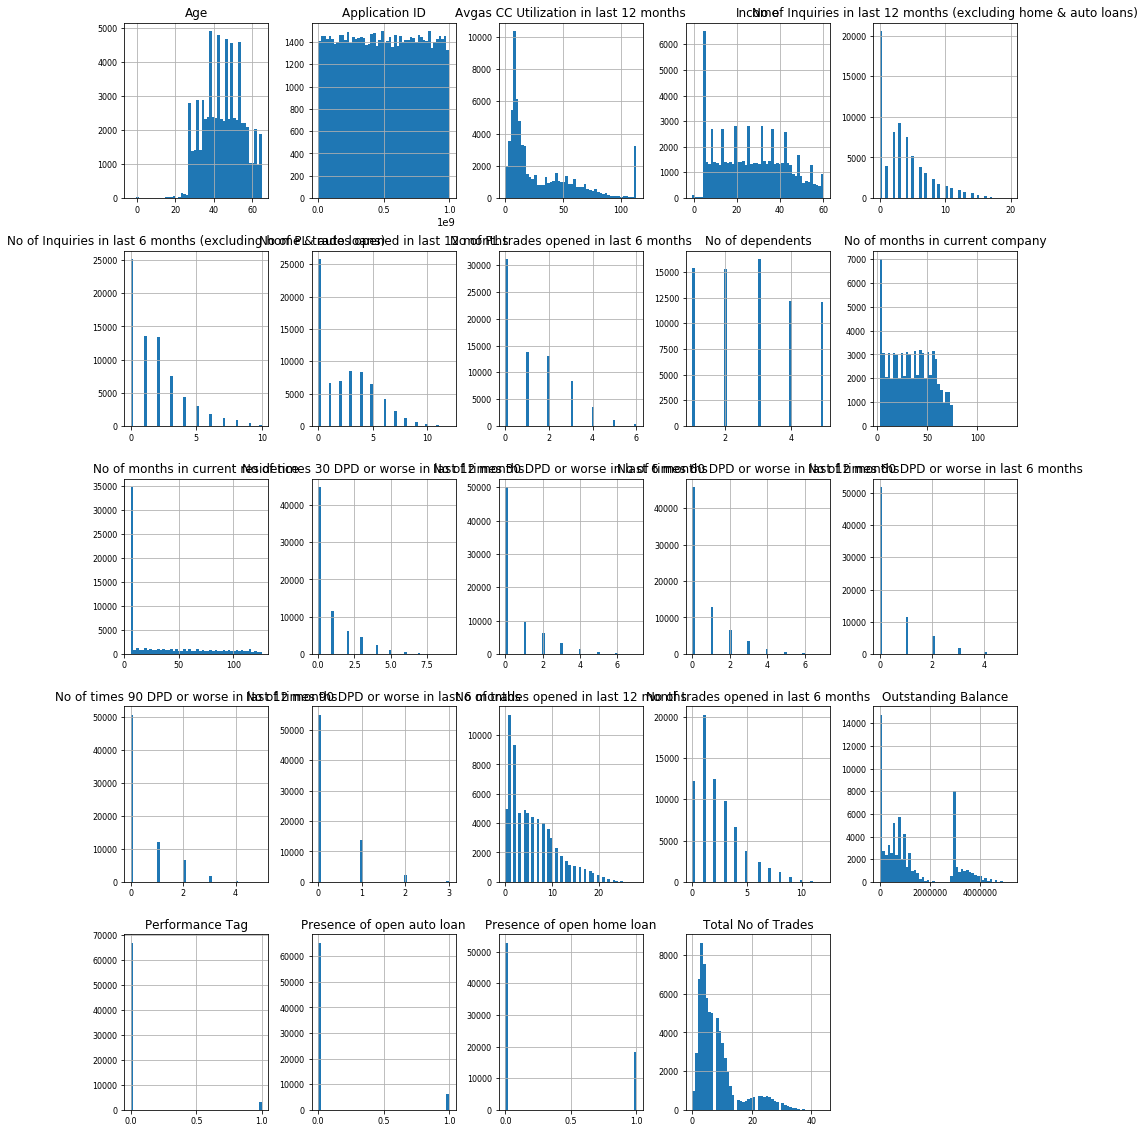

In [86]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71291
Data columns (total 29 columns):
Application ID                                                     71292 non-null int64
Age                                                                71292 non-null int64
Gender                                                             71290 non-null object
Marital Status (at the time of application)                        71286 non-null object
No of dependents                                                   71289 non-null float64
Income                                                             71292 non-null float64
Education                                                          71173 non-null object
Profession                                                         71278 non-null object
Type of residence                                                  71284 non-null object
No of months in current residence                                  71292 non-null int64
No

In [88]:
# creating dummy variables for categorical variables
# subset all categorical variables
data_categorical = data.select_dtypes(include=['object'])
data_categorical.head()

,Gender,Marital Status (at the time of application),Education,Profession,Type of residence
0,F,Married,Bachelor,SAL,Rented
1,M,Married,Professional,SE_PROF,Rented
2,M,Single,Bachelor,SE_PROF,Rented
3,M,Married,Bachelor,SE,Rented
4,F,Married,Professional,SAL,Rented


In [89]:
# convert into dummies
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,Gender_M,Marital Status (at the time of application)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,1,0,0,0,1
2,1,1,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,1


In [90]:
# drop categorical variables 
data = data.drop(list(data_categorical.columns), axis=1)

In [91]:
# concat dummy variables with X
data = pd.concat([data, data_dummies], axis=1)

In [92]:
# Final Dataset
data.head()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
0,954457215,48,2.0,40.0,113,56,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,432830445,31,4.0,55.0,112,46,0.0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,941387308,32,2.0,46.0,104,49,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,392161677,43,1.0,53.0,94,53,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,182011211,35,5.0,44.0,112,43,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [93]:
# Data with Application ID in case we need to join back
data_id = data['Application ID']

In [94]:
data = data.drop(columns = ['Application ID'])

In [95]:
data.isnull().sum()

Age                                                                   0
No of dependents                                                      3
Income                                                                0
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag                                                    1425
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                            

In [96]:
data.shape

(71292, 35)

In [97]:
# Data with all approved application which has performance tag
data1 = data[data['Performance Tag'].notnull()]
data1.shape

(69867, 35)

In [98]:
# Data with all rejected application which has performance tag
data2 = data[data['Performance Tag'].isnull()]
data2.shape

(1425, 35)

## WOE and IV

In [99]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [100]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [101]:
final_iv_data, IV_data = data_vars(data1,data1['Performance Tag'])

In [102]:
final_iv_data

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Age,-3.0,40.0,24636,1071.0,0.043473,23565.0,0.956527,0.363420,0.352137,0.031540,0.000624
1,Age,41.0,50.0,22872,958.0,0.041885,21914.0,0.958115,0.325076,0.327466,-0.007323,0.000624
2,Age,51.0,65.0,22359,918.0,0.041057,21441.0,0.958943,0.311503,0.320397,-0.028153,0.000624
3,No of dependents,1.0,3.0,45991,1950.0,0.042400,44041.0,0.957600,0.661690,0.658114,0.005419,0.000056
4,No of dependents,4.0,5.0,23873,997.0,0.041763,22876.0,0.958237,0.338310,0.341841,-0.010383,0.000056
5,No of dependents,NaN,NaN,3,0.0,0.000000,3.0,1.000000,0.000000,0.000045,0.000000,0.000056
6,Income,-0.5,10.0,12840,713.0,0.055530,12127.0,0.944470,0.241941,0.181216,0.289002,0.037613
7,Income,11.0,18.0,10599,472.0,0.044533,10127.0,0.955467,0.160163,0.151330,0.056729,0.037613
8,Income,19.0,27.0,12285,546.0,0.044444,11739.0,0.955556,0.185273,0.175418,0.054657,0.037613
9,Income,28.0,35.0,11014,451.0,0.040948,10563.0,0.959052,0.153037,0.157845,-0.030935,0.037613


In [103]:
IV_data.sort_values('IV',ascending=False)

,VAR_NAME,IV
1,Avgas CC Utilization in last 12 months,0.293838
22,No of trades opened in last 12 months,0.257459
9,No of Inquiries in last 12 months (excluding h...,0.229215
30,Total No of Trades,0.189931
16,No of times 30 DPD or worse in last 12 months,0.188030
11,No of PL trades opened in last 12 months,0.176652
17,No of times 30 DPD or worse in last 6 months,0.145689
18,No of times 60 DPD or worse in last 12 months,0.137659
12,No of PL trades opened in last 6 months,0.124767
20,No of times 90 DPD or worse in last 12 months,0.095693


In [104]:
IV_Data_Useful = IV_data['IV'] > 0.02

In [105]:
IV_Data_Useful
IV_data_final = IV_data[IV_Data_Useful]
IV_data_final

,VAR_NAME,IV
1,Avgas CC Utilization in last 12 months,0.293838
7,Income,0.037613
9,No of Inquiries in last 12 months (excluding h...,0.229215
10,No of Inquiries in last 6 months (excluding ho...,0.092927
11,No of PL trades opened in last 12 months,0.176652
12,No of PL trades opened in last 6 months,0.124767
15,No of months in current residence,0.052053
16,No of times 30 DPD or worse in last 12 months,0.188030
17,No of times 30 DPD or worse in last 6 months,0.145689
18,No of times 60 DPD or worse in last 12 months,0.137659


In [106]:
final_iv_data_useful = final_iv_data[final_iv_data['IV'] > 0.02]

In [107]:
final_iv_data_useful

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
6,Income,-0.5,10.0,12840,713.0,0.055530,12127.0,0.944470,0.241941,0.181216,0.289002,0.037613
7,Income,11.0,18.0,10599,472.0,0.044533,10127.0,0.955467,0.160163,0.151330,0.056729,0.037613
8,Income,19.0,27.0,12285,546.0,0.044444,11739.0,0.955556,0.185273,0.175418,0.054657,0.037613
9,Income,28.0,35.0,11014,451.0,0.040948,10563.0,0.959052,0.153037,0.157845,-0.030935,0.037613
10,Income,36.0,44.0,11923,398.0,0.033381,11525.0,0.966619,0.135053,0.172221,-0.243112,0.037613
11,Income,45.0,60.0,11206,367.0,0.032750,10839.0,0.967250,0.124533,0.161970,-0.262834,0.037613
12,No of months in current residence,6.0,10.0,35080,1160.0,0.033067,33920.0,0.966933,0.393621,0.506874,-0.252875,0.052053
13,No of months in current residence,11.0,126.0,34787,1787.0,0.051370,33000.0,0.948630,0.606379,0.493126,0.206741,0.052053
20,No of times 90 DPD or worse in last 6 months,0.0,1.0,67883,2764.0,0.040717,65119.0,0.959283,0.937903,0.973087,-0.036827,0.030713
21,No of times 90 DPD or worse in last 6 months,2.0,3.0,1984,183.0,0.092238,1801.0,0.907762,0.062097,0.026913,0.836099,0.030713


### Applying WOE and IV values to dataframe columns

In [108]:
transform_vars_list_data = data1.columns.difference(['Performance Tag'])
transform_prefix_data = '' # leave this value blank if you need replace the original column values

In [109]:
transform_vars_list_data

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Education_Masters',
       'Education_Others', 'Education_Phd', 'Education_Professional',
       'Gender_M', 'Income',
       'Marital Status (at the time of application)_Single',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of months in current company', 'No of months in current residence',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last

In [110]:
for var in transform_vars_list_data:
    small_df_data = final_iv_data[final_iv_data['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df_data.MAX_VALUE,small_df_data.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            data1[transform_prefix_data + var] = data1[var].apply(lambda x: eval(replace_cmd))
        except:
            data1[transform_prefix_data + var] = data1[var].apply(lambda x: eval(replace_cmd1))

In [111]:
# Dataset with woe values 
data1.head()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
0,-0.007323,0,-0.243112,0.206741,-0.123015,0.0,-0.036827,-0.121384,-0.198515,-0.1336,...,-0.004046,-0.001058,0.001985,0.009493,-0.023996,0.004000,-0.00182,0.00119,-0.001042,-0.004294
1,0.031540,0,-0.262834,0.206741,-0.073137,0.0,-0.036827,-0.121384,-0.198515,-0.1336,...,-0.004046,-0.001058,0.001985,-0.017931,-0.023996,-0.013298,-0.00182,0.00119,-0.001042,-0.004294
2,0.031540,0,-0.262834,0.206741,-0.073137,0.0,-0.036827,-0.121384,-0.198515,-0.1336,...,-0.004046,-0.001058,0.001985,0.009493,-0.023996,-0.013298,-0.00182,0.00119,-0.001042,-0.004294
3,-0.007323,0,-0.262834,0.206741,-0.123015,0.0,-0.036827,-0.121384,-0.198515,-0.1336,...,-0.004046,-0.001058,0.001985,0.009493,0.091424,0.004000,-0.00182,0.00119,-0.001042,-0.004294
4,0.031540,0,-0.243112,0.206741,-0.073137,0.0,-0.036827,-0.121384,-0.198515,-0.1336,...,-0.004046,-0.001058,0.001985,-0.017931,-0.023996,0.004000,-0.00182,0.00119,-0.001042,-0.004294


In [112]:
data1.isnull().sum()

Age                                                                0
No of dependents                                                   0
Income                                                             0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag                                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in last 12 months                      0
No of times 60 DPD or worse in last 12 months                      0
No of times 30 DPD or worse in last 12 months                      0
Avgas CC Utilization in last 12 months                             0
No of trades opened in last 6 months                               0
No of trades opened in last 12 mon

In [113]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 71291
Data columns (total 35 columns):
Age                                                                69867 non-null float64
No of dependents                                                   69867 non-null int64
Income                                                             69867 non-null float64
No of months in current residence                                  69867 non-null float64
No of months in current company                                    69867 non-null float64
Performance Tag                                                    69867 non-null float64
No of times 90 DPD or worse in last 6 months                       69867 non-null float64
No of times 60 DPD or worse in last 6 months                       69867 non-null float64
No of times 30 DPD or worse in last 6 months                       69867 non-null float64
No of times 90 DPD or worse in last 12 months                      69867 non-null f

# Modelling

Now that the data preparation step is complete, we will jump straight into modelling We will look at three different models
•Logistic Regression
•Decision Tree
•Random Forests


## Model for Demographic Data set
### First we are creating model only on Demographic data to understand how much role does it play

In [114]:
# split into X and y
X = data1.drop(['Performance Tag','No of times 90 DPD or worse in last 6 months','No of times 60 DPD or worse in last 6 months','No of times 30 DPD or worse in last 6 months','No of times 90 DPD or worse in last 12 months','No of times 60 DPD or worse in last 12 months','No of times 30 DPD or worse in last 12 months','Avgas CC Utilization in last 12 months','No of trades opened in last 6 months','No of trades opened in last 12 months','No of PL trades opened in last 6 months','No of PL trades opened in last 12 months','No of Inquiries in last 6 months (excluding home & auto loans)','No of Inquiries in last 12 months (excluding home & auto loans)','Presence of open home loan','Outstanding Balance','Total No of Trades','Presence of open auto loan'], axis = 1)
y = data1['Performance Tag']

In [115]:
X.columns

Index(['Age', 'No of dependents', 'Income',
       'No of months in current residence', 'No of months in current company',
       'Gender_M', 'Marital Status (at the time of application)_Single',
       'Education_Masters', 'Education_Others', 'Education_Phd',
       'Education_Professional', 'Profession _SE', 'Profession _SE_PROF',
       'Type of residence_Living with Parents', 'Type of residence_Others',
       'Type of residence_Owned', 'Type of residence_Rented'],
      dtype='object')

In [116]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [117]:
import statsmodels.api as sm

In [118]:
# Logistic regression model
# First Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48889
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8383.1
Date:                Sat, 21 Sep 2019   Deviance:                       16766.
Time:                        13:31:39   Pearson chi2:                 4.91e+04
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 -3.1339      0.023   -136.857      0.000      -3.179      -3.089
Age                                                    0.4329      0.946      0.457      0.647      -1.422       2.287
No of dependents                                    2.602e-14    3.8e-14      0.684      0.494   -4.85e-14    1.01e-13
Income                                                 0.9089      0.118      7.716      0.000       0.678       1.140
No of months in current residence                      0.8243      0.102      8.089      0.000       0.625       1.024
No of months in current company                        1.1768      0.199      5.923      0.000       0.787       1.566
Gender_M                                               1.1796      1.252      0.942      0.346      -1.275       3.634
Marital Status (at the time of application)_Single    -3.1214      2.431     -1.284      0.199      -7.886       1.643
Education_Masters                                      1.6077      4.951      0.325      0.745      -8.096      11.311
Education_Others                                       1.4040      0.809      1.737      0.082      -0.181       2.989
Education_Phd                                          3.4137      3.334      1.024      0.306      -3.120       9.947
Education_Professional                                 1.0852      2.165      0.501      0.616      -3.158       5.328
Profession _SE                                         0.9048      0.500      1.809      0.071      -0.076       1.885
Profession _SE_PROF                                    0.1845      3.281      0.056      0.955      -6.246       6.615
Type of residence_Living with Parents                 -2.0126      2.960     -0.680      0.497      -7.815       3.790
Type of residence_Others                               0.9417      0.993      0.948      0.343      -1.005       2.888
Type of residence_Owned                              -20.1906     29.587     -0.682      0.495     -78.181      37.800
Type of residence_Rented                               7.8170      8.702      0.898      0.369      -9.239      24.873
======================================================================================================================
"""

### Feature Selection Using RFE

In [119]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [120]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 3)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [121]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 11),
 ('No of dependents', False, 15),
 ('Income', True, 1),
 ('No of months in current residence', True, 1),
 ('No of months in current company', True, 1),
 ('Gender_M', False, 4),
 ('Marital Status (at the time of application)_Single', False, 5),
 ('Education_Masters', False, 9),
 ('Education_Others', False, 2),
 ('Education_Phd', False, 7),
 ('Education_Professional', False, 8),
 ('Profession _SE', False, 3),
 ('Profession _SE_PROF', False, 12),
 ('Type of residence_Living with Parents', False, 13),
 ('Type of residence_Others', False, 6),
 ('Type of residence_Owned', False, 14),
 ('Type of residence_Rented', False, 10)]

In [122]:
col = X_train.columns[rfe.support_]

In [123]:
X_train.columns[~rfe.support_]

Index(['Age', 'No of dependents', 'Gender_M',
       'Marital Status (at the time of application)_Single',
       'Education_Masters', 'Education_Others', 'Education_Phd',
       'Education_Professional', 'Profession _SE', 'Profession _SE_PROF',
       'Type of residence_Living with Parents', 'Type of residence_Others',
       'Type of residence_Owned', 'Type of residence_Rented'],
      dtype='object')

In [124]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48902
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8389.2
Date:                Sat, 21 Sep 2019   Deviance:                       16778.
Time:                        13:31:47   Pearson chi2:                 4.90e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1329      0.023   -136.998      0.000      -3.178      -3.088
Income                                0.9068      0.118      7.715      0.000       0.676       1.137
No of months in current residence     0.8289      0.102      8.149      0.000       0.630       1.028
No of months in current company       1.1762      0.199      5.923      0.000       0.787       1.565
=====================================================================================================
"""

In [125]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

45071    0.075655
5295     0.058112
6910     0.058112
32986    0.033018
54700    0.048089
27469    0.040446
25840    0.032958
16415    0.038229
34330    0.040446
32354    0.043567
dtype: float64

In [126]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07565474, 0.05811164, 0.05811164, 0.03301807, 0.04808935,
       0.04044578, 0.03295792, 0.03822931, 0.04044578, 0.0435674 ])

In [127]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,CustID
0,1.0,0.075655,45071
1,0.0,0.058112,5295
2,0.0,0.058112,6910
3,0.0,0.033018,32986
4,0.0,0.048089,54700


In [128]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.038 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,1.0,0.075655,45071,1
1,0.0,0.058112,5295,1
2,0.0,0.058112,6910,1
3,0.0,0.033018,32986,0
4,0.0,0.048089,54700,1


In [129]:
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

In [130]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_pred_final.Converted, y_train_pred_final.predicted, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
print("AUC:    \t", round(roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob),2))

[[21069 25796]
 [  666  1375]]
Sensitivity: 	0.67
Specificity: 	0.45
AUC:    	 0.59


In [131]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Convert_Prob, drop_intermediate = False )

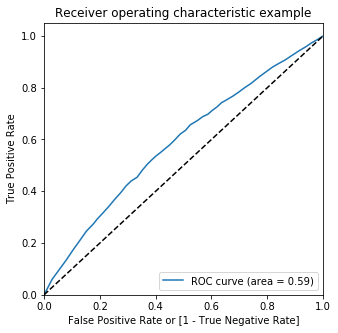

In [133]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

## Final Model for Complete Dataset
## Here is Logistic Regression Model which is our final selected model
### We have tried other models also which are present at bottom part of code for reference. Though random forest is also giving good result, but we will have to assign score so we have selected logistic model as final model

In [134]:
# split into X and y
X = data1.drop(['Performance Tag'], axis = 1)
y = data1['Performance Tag']

In [135]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [136]:
import statsmodels.api as sm

In [137]:
# Logistic regression model
# First Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48876
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8122.0
Date:                Sat, 21 Sep 2019   Deviance:                       16244.
Time:                        13:31:51   Pearson chi2:                 4.84e+04
No. Iterations:                    12   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1381      0.024   -131.765      0.000      -3.185      -3.091
Age                                                                 0.6301      0.953      0.661      0.508      -1.238       2.498
No of dependents                                                 2.211e-14   1.18e-14      1.872      0.061   -1.04e-15    4.53e-14
Income                                                              0.2373      0.122      1.938      0.053      -0.003       0.477
No of months in current residence                                   0.1869      0.110      1.699      0.089      -0.029       0.402
No of months in current company                                     0.6789      0.203      3.345      0.001       0.281       1.077
No of times 90 DPD or worse in last 6 months                        0.0957      0.134      0.714      0.475      -0.167       0.358
No of times 60 DPD or worse in last 6 months                       -0.0690      0.123     -0.564      0.573      -0.309       0.171
No of times 30 DPD or worse in last 6 months                       -0.0417      0.118     -0.354      0.723      -0.272       0.189
No of times 90 DPD or worse in last 12 months                       0.1140      0.090      1.260      0.207      -0.063       0.291
No of times 60 DPD or worse in last 12 months                       0.1416      0.101      1.406      0.160      -0.056       0.339
No of times 30 DPD or worse in last 12 months                       0.4830      0.094      5.143      0.000       0.299       0.667
Avgas CC Utilization in last 12 months                           1.262e-14   9.35e-15      1.349      0.177   -5.72e-15     3.1e-14
No of trades opened in last 6 months                            -9.531e-15   8.16e-15     -1.168      0.243   -2.55e-14    6.47e-15
No of trades opened in last 12 months                               0.4917      0.106      4.635      0.000       0.284       0.700
No of PL trades opened in last 6 months                             0.0941      0.093      1.015      0.310      -0.088       0.276
No of PL trades opened in last 12 months                            0.1068      0.092      1.156      0.248      -0.074       0.288
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2175      0.097     -2.239      0.025      -0.408      -0.027
No of Inquiries in last 12 months (excluding home & auto loans)     0.5799      0.092      6.274      0.000       0.399       0.761
Presence of open home loan                                       2.376e-14   3.98e-14      0.596      0.551   -5.43e-14    1.02e-13
Outstanding Balance                                             -1.217e-14   1.96e-14     -0.622      0.534   -5.05e-14    2.6

In [138]:
### 4.1: Feature Selection Using RFE

In [139]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [140]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [141]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('No of dependents', False, 14),
 ('Income', True, 1),
 ('No of months in current residence', True, 1),
 ('No of months in current company', True, 1),
 ('No of times 90 DPD or worse in last 6 months', False, 5),
 ('No of times 60 DPD or worse in last 6 months', False, 6),
 ('No of times 30 DPD or worse in last 6 months', False, 10),
 ('No of times 90 DPD or worse in last 12 months', True, 1),
 ('No of times 60 DPD or worse in last 12 months', False, 3),
 ('No of times 30 DPD or worse in last 12 months', True, 1),
 ('Avgas CC Utilization in last 12 months', False, 13),
 ('No of trades opened in last 6 months', False, 12),
 ('No of trades opened in last 12 months', True, 1),
 ('No of PL trades opened in last 6 months', False, 4),
 ('No of PL trades opened in last 12 months', True, 1),
 ('No of Inquiries in last 6 months (excluding home & auto loans)', True, 1),
 ('No of Inquiries in last 12 months (excluding home & auto loans)', True, 1),
 ('Presence of open home loan

In [142]:
col = X_train.columns[rfe.support_]

In [143]:
X_train.columns[~rfe.support_]

Index(['No of dependents', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of PL trades opened in last 6 months', 'Presence of open home loan',
       'Outstanding Balance', 'Presence of open auto loan',
       'Profession _SE_PROF', 'Type of residence_Living with Parents',
       'Type of residence_Owned'],
      dtype='object')

In [144]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48885
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8124.1
Date:                Sat, 21 Sep 2019   Deviance:                       16248.
Time:                        13:32:02   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1377      0.024   -131.799      0.000      -3.184      -3.091
Age                                                                 0.5472      0.938      0.583      0.560      -1.292       2.386
Income                                                              0.2408      0.122      1.968      0.049       0.001       0.481
No of months in current residence                                   0.1917      0.110      1.747      0.081      -0.023       0.407
No of months in current company                                     0.6895      0.203      3.401      0.001       0.292       1.087
No of times 90 DPD or worse in last 12 months                       0.1497      0.080      1.862      0.063      -0.008       0.307
No of times 30 DPD or worse in last 12 months                       0.5070      0.064      7.918      0.000       0.382       0.633
No of trades opened in last 12 months                               0.4970      0.106      4.696      0.000       0.290       0.705
No of PL trades opened in last 12 months                            0.1557      0.080      1.939      0.052      -0.002       0.313
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2114      0.097     -2.180      0.029      -0.401      -0.021
No of Inquiries in last 12 months (excluding home & auto loans)     0.5779      0.092      6.261      0.000       0.397       0.759
Total No of Trades                                                 -0.2125      0.111     -1.908      0.056      -0.431       0.006
Gender_M                                                            1.2721      1.260      1.010      0.313      -1.197       3.741
Marital Status (at the time of application)_Single                 -3.8746      2.443     -1.586      0.113      -8.662       0.913
Education_Masters                                                   2.0011      4.979      0.402      0.688      -7.757      11.760
Education_Others                                                    1.4750      0.819      1.801      0.072      -0.130       3.080
Education_Phd                                                       2.7084      3.352      0.808      0.419      -3.861       9.277
Education_Professional                                              1.1547      2.177      0.530      0.596      -3.112       5.421
Profession _SE                                                      0.6447      0.479      1.345      0.179      -0.295       1.584
Type of residence_Others                                            0.7864      0.963      0.817      0.414      -1.100       2.673
Type of residence_Rented                                            2.2491      3.102      0.725      0.468      -3.831       

In [145]:
col = col.drop('Education_Masters', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48886
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8124.1
Date:                Sat, 21 Sep 2019   Deviance:                       16248.
Time:                        13:32:03   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1377      0.024   -131.801      0.000      -3.184      -3.091
Age                                                                 0.5464      0.938      0.582      0.560      -1.292       2.385
Income                                                              0.2409      0.122      1.968      0.049       0.001       0.481
No of months in current residence                                   0.1910      0.110      1.741      0.082      -0.024       0.406
No of months in current company                                     0.6897      0.203      3.402      0.001       0.292       1.087
No of times 90 DPD or worse in last 12 months                       0.1499      0.080      1.864      0.062      -0.008       0.308
No of times 30 DPD or worse in last 12 months                       0.5070      0.064      7.917      0.000       0.381       0.633
No of trades opened in last 12 months                               0.4969      0.106      4.694      0.000       0.289       0.704
No of PL trades opened in last 12 months                            0.1557      0.080      1.940      0.052      -0.002       0.313
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2119      0.097     -2.186      0.029      -0.402      -0.022
No of Inquiries in last 12 months (excluding home & auto loans)     0.5780      0.092      6.263      0.000       0.397       0.759
Total No of Trades                                                 -0.2124      0.111     -1.908      0.056      -0.431       0.006
Gender_M                                                            1.2707      1.260      1.009      0.313      -1.199       3.740
Marital Status (at the time of application)_Single                 -3.8695      2.442     -1.584      0.113      -8.657       0.918
Education_Others                                                    1.4472      0.816      1.774      0.076      -0.152       3.046
Education_Phd                                                       3.1451      3.169      0.993      0.321      -3.066       9.356
Education_Professional                                              1.6558      1.780      0.930      0.352      -1.833       5.145
Profession _SE                                                      0.6455      0.479      1.347      0.178      -0.294       1.585
Type of residence_Others                                            0.7884      0.963      0.819      0.413      -1.098       2.675
Type of residence_Rented                                            2.2590      3.102      0.728      0.466      -3.821       8.339
==============================================================================================================================

In [146]:
col = col.drop('Age', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48887
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8124.3
Date:                Sat, 21 Sep 2019   Deviance:                       16249.
Time:                        13:32:03   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1377      0.024   -131.803      0.000      -3.184      -3.091
Income                                                              0.2453      0.122      2.010      0.044       0.006       0.485
No of months in current residence                                   0.1931      0.110      1.761      0.078      -0.022       0.408
No of months in current company                                     0.6879      0.203      3.393      0.001       0.291       1.085
No of times 90 DPD or worse in last 12 months                       0.1503      0.080      1.869      0.062      -0.007       0.308
No of times 30 DPD or worse in last 12 months                       0.5076      0.064      7.927      0.000       0.382       0.633
No of trades opened in last 12 months                               0.4962      0.106      4.688      0.000       0.289       0.704
No of PL trades opened in last 12 months                            0.1557      0.080      1.940      0.052      -0.002       0.313
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2116      0.097     -2.183      0.029      -0.402      -0.022
No of Inquiries in last 12 months (excluding home & auto loans)     0.5778      0.092      6.261      0.000       0.397       0.759
Total No of Trades                                                 -0.2123      0.111     -1.906      0.057      -0.431       0.006
Gender_M                                                            1.2647      1.260      1.004      0.315      -1.204       3.734
Marital Status (at the time of application)_Single                 -3.5599      2.384     -1.493      0.135      -8.232       1.113
Education_Others                                                    1.4549      0.816      1.784      0.074      -0.144       3.054
Education_Phd                                                       3.1278      3.169      0.987      0.324      -3.083       9.338
Education_Professional                                              1.6568      1.780      0.931      0.352      -1.832       5.146
Profession _SE                                                      0.6438      0.479      1.343      0.179      -0.295       1.583
Type of residence_Others                                            0.7889      0.963      0.820      0.412      -1.098       2.675
Type of residence_Rented                                            2.3843      3.094      0.771      0.441      -3.681       8.449
===================================================================================================================================
"""

In [147]:
col = col.drop('Type of residence_Rented', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48888
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8124.6
Date:                Sat, 21 Sep 2019   Deviance:                       16249.
Time:                        13:32:04   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1377      0.024   -131.807      0.000      -3.184      -3.091
Income                                                              0.2459      0.122      2.015      0.044       0.007       0.485
No of months in current residence                                   0.1926      0.110      1.756      0.079      -0.022       0.408
No of months in current company                                     0.6882      0.203      3.395      0.001       0.291       1.086
No of times 90 DPD or worse in last 12 months                       0.1507      0.080      1.874      0.061      -0.007       0.308
No of times 30 DPD or worse in last 12 months                       0.5070      0.064      7.919      0.000       0.382       0.633
No of trades opened in last 12 months                               0.4969      0.106      4.694      0.000       0.289       0.704
No of PL trades opened in last 12 months                            0.1553      0.080      1.934      0.053      -0.002       0.313
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2111      0.097     -2.178      0.029      -0.401      -0.021
No of Inquiries in last 12 months (excluding home & auto loans)     0.5775      0.092      6.258      0.000       0.397       0.758
Total No of Trades                                                 -0.2124      0.111     -1.907      0.056      -0.431       0.006
Gender_M                                                            1.2650      1.260      1.004      0.315      -1.204       3.734
Marital Status (at the time of application)_Single                 -3.4860      2.382     -1.463      0.143      -8.155       1.183
Education_Others                                                    1.4502      0.816      1.778      0.075      -0.149       3.049
Education_Phd                                                       3.1172      3.169      0.984      0.325      -3.093       9.328
Education_Professional                                              1.6478      1.780      0.926      0.355      -1.841       5.137
Profession _SE                                                      0.6335      0.479      1.322      0.186      -0.305       1.572
Type of residence_Others                                            0.7317      0.960      0.762      0.446      -1.149       2.613
===================================================================================================================================
"""

In [148]:
col = col.drop('Type of residence_Others', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48889
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8124.9
Date:                Sat, 21 Sep 2019   Deviance:                       16250.
Time:                        13:32:05   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1378      0.024   -131.812      0.000      -3.184      -3.091
Income                                                              0.2465      0.122      2.019      0.043       0.007       0.486
No of months in current residence                                   0.1933      0.110      1.763      0.078      -0.022       0.408
No of months in current company                                     0.6897      0.203      3.403      0.001       0.292       1.087
No of times 90 DPD or worse in last 12 months                       0.1512      0.080      1.881      0.060      -0.006       0.309
No of times 30 DPD or worse in last 12 months                       0.5063      0.064      7.909      0.000       0.381       0.632
No of trades opened in last 12 months                               0.4969      0.106      4.694      0.000       0.289       0.704
No of PL trades opened in last 12 months                            0.1552      0.080      1.934      0.053      -0.002       0.313
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2117      0.097     -2.184      0.029      -0.402      -0.022
No of Inquiries in last 12 months (excluding home & auto loans)     0.5776      0.092      6.259      0.000       0.397       0.758
Total No of Trades                                                 -0.2119      0.111     -1.903      0.057      -0.430       0.006
Gender_M                                                            1.2642      1.260      1.004      0.316      -1.205       3.733
Marital Status (at the time of application)_Single                 -3.4824      2.382     -1.462      0.144      -8.151       1.186
Education_Others                                                    1.4521      0.816      1.780      0.075      -0.147       3.051
Education_Phd                                                       3.1162      3.169      0.983      0.325      -3.094       9.326
Education_Professional                                              1.6419      1.780      0.922      0.356      -1.847       5.131
Profession _SE                                                      0.6326      0.479      1.321      0.187      -0.306       1.571
===================================================================================================================================
"""

In [149]:
col = col.drop('Education_Professional', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48890
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8125.4
Date:                Sat, 21 Sep 2019   Deviance:                       16251.
Time:                        13:32:05   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1377      0.024   -131.820      0.000      -3.184      -3.091
Income                                                              0.2463      0.122      2.017      0.044       0.007       0.486
No of months in current residence                                   0.1934      0.110      1.763      0.078      -0.022       0.408
No of months in current company                                     0.6888      0.203      3.398      0.001       0.291       1.086
No of times 90 DPD or worse in last 12 months                       0.1523      0.080      1.894      0.058      -0.005       0.310
No of times 30 DPD or worse in last 12 months                       0.5059      0.064      7.903      0.000       0.380       0.631
No of trades opened in last 12 months                               0.4967      0.106      4.692      0.000       0.289       0.704
No of PL trades opened in last 12 months                            0.1549      0.080      1.930      0.054      -0.002       0.312
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2122      0.097     -2.189      0.029      -0.402      -0.022
No of Inquiries in last 12 months (excluding home & auto loans)     0.5772      0.092      6.254      0.000       0.396       0.758
Total No of Trades                                                 -0.2111      0.111     -1.896      0.058      -0.429       0.007
Gender_M                                                            1.2581      1.260      0.999      0.318      -1.211       3.727
Marital Status (at the time of application)_Single                 -3.4724      2.382     -1.458      0.145      -8.141       1.196
Education_Others                                                    1.4857      0.815      1.823      0.068      -0.112       3.083
Education_Phd                                                       2.5873      3.118      0.830      0.407      -3.523       8.698
Profession _SE                                                      0.6330      0.479      1.321      0.186      -0.306       1.572
===================================================================================================================================
"""

In [150]:
col = col.drop('Education_Phd', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48891
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8125.7
Date:                Sat, 21 Sep 2019   Deviance:                       16251.
Time:                        13:32:06   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1374      0.024   -131.842      0.000      -3.184      -3.091
Income                                                              0.2459      0.122      2.014      0.044       0.007       0.485
No of months in current residence                                   0.1938      0.110      1.768      0.077      -0.021       0.409
No of months in current company                                     0.6878      0.203      3.393      0.001       0.290       1.085
No of times 90 DPD or worse in last 12 months                       0.1522      0.080      1.893      0.058      -0.005       0.310
No of times 30 DPD or worse in last 12 months                       0.5061      0.064      7.907      0.000       0.381       0.632
No of trades opened in last 12 months                               0.4966      0.106      4.691      0.000       0.289       0.704
No of PL trades opened in last 12 months                            0.1552      0.080      1.933      0.053      -0.002       0.313
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2123      0.097     -2.190      0.029      -0.402      -0.022
No of Inquiries in last 12 months (excluding home & auto loans)     0.5774      0.092      6.257      0.000       0.397       0.758
Total No of Trades                                                 -0.2110      0.111     -1.895      0.058      -0.429       0.007
Gender_M                                                            1.2652      1.260      1.004      0.315      -1.204       3.734
Marital Status (at the time of application)_Single                 -3.4842      2.382     -1.463      0.144      -8.153       1.184
Education_Others                                                    1.4955      0.815      1.835      0.066      -0.102       3.093
Profession _SE                                                      0.6321      0.479      1.320      0.187      -0.307       1.571
===================================================================================================================================
"""

In [151]:
col = col.drop('Gender_M', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48892
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8126.2
Date:                Sat, 21 Sep 2019   Deviance:                       16252.
Time:                        13:32:06   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1375      0.024   -131.849      0.000      -3.184      -3.091
Income                                                              0.2462      0.122      2.017      0.044       0.007       0.485
No of months in current residence                                   0.1930      0.110      1.760      0.078      -0.022       0.408
No of months in current company                                     0.6875      0.203      3.392      0.001       0.290       1.085
No of times 90 DPD or worse in last 12 months                       0.1516      0.080      1.885      0.059      -0.006       0.309
No of times 30 DPD or worse in last 12 months                       0.5070      0.064      7.921      0.000       0.382       0.632
No of trades opened in last 12 months                               0.4967      0.106      4.691      0.000       0.289       0.704
No of PL trades opened in last 12 months                            0.1548      0.080      1.929      0.054      -0.002       0.312
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2124      0.097     -2.192      0.028      -0.402      -0.022
No of Inquiries in last 12 months (excluding home & auto loans)     0.5776      0.092      6.258      0.000       0.397       0.759
Total No of Trades                                                 -0.2116      0.111     -1.900      0.057      -0.430       0.007
Marital Status (at the time of application)_Single                 -3.4719      2.382     -1.458      0.145      -8.140       1.196
Education_Others                                                    1.4915      0.815      1.830      0.067      -0.106       3.089
Profession _SE                                                      0.6369      0.479      1.330      0.184      -0.302       1.576
===================================================================================================================================
"""

In [152]:
col = col.drop('Profession _SE', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48893
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8127.1
Date:                Sat, 21 Sep 2019   Deviance:                       16254.
Time:                        13:32:06   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1374      0.024   -131.864      0.000      -3.184      -3.091
Income                                                              0.2459      0.122      2.015      0.044       0.007       0.485
No of months in current residence                                   0.1942      0.110      1.771      0.077      -0.021       0.409
No of months in current company                                     0.6850      0.203      3.380      0.001       0.288       1.082
No of times 90 DPD or worse in last 12 months                       0.1517      0.080      1.887      0.059      -0.006       0.309
No of times 30 DPD or worse in last 12 months                       0.5073      0.064      7.926      0.000       0.382       0.633
No of trades opened in last 12 months                               0.4978      0.106      4.701      0.000       0.290       0.705
No of PL trades opened in last 12 months                            0.1554      0.080      1.936      0.053      -0.002       0.313
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2135      0.097     -2.203      0.028      -0.403      -0.024
No of Inquiries in last 12 months (excluding home & auto loans)     0.5782      0.092      6.264      0.000       0.397       0.759
Total No of Trades                                                 -0.2120      0.111     -1.904      0.057      -0.430       0.006
Marital Status (at the time of application)_Single                 -3.4910      2.382     -1.466      0.143      -8.159       1.177
Education_Others                                                    1.4851      0.815      1.823      0.068      -0.112       3.082
===================================================================================================================================
"""

In [153]:
col = col.drop('Marital Status (at the time of application)_Single', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48894
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8128.2
Date:                Sat, 21 Sep 2019   Deviance:                       16256.
Time:                        13:32:07   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1370      0.024   -131.893      0.000      -3.184      -3.090
Income                                                              0.2423      0.122      1.985      0.047       0.003       0.481
No of months in current residence                                   0.1924      0.110      1.755      0.079      -0.022       0.407
No of months in current company                                     0.6874      0.203      3.392      0.001       0.290       1.085
No of times 90 DPD or worse in last 12 months                       0.1519      0.080      1.889      0.059      -0.006       0.309
No of times 30 DPD or worse in last 12 months                       0.5066      0.064      7.914      0.000       0.381       0.632
No of trades opened in last 12 months                               0.4955      0.106      4.682      0.000       0.288       0.703
No of PL trades opened in last 12 months                            0.1555      0.080      1.937      0.053      -0.002       0.313
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2134      0.097     -2.202      0.028      -0.403      -0.023
No of Inquiries in last 12 months (excluding home & auto loans)     0.5792      0.092      6.275      0.000       0.398       0.760
Total No of Trades                                                 -0.2110      0.111     -1.895      0.058      -0.429       0.007
Education_Others                                                    1.4822      0.815      1.819      0.069      -0.115       3.079
===================================================================================================================================
"""

In [154]:
col = col.drop('No of months in current residence', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48895
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8129.7
Date:                Sat, 21 Sep 2019   Deviance:                       16259.
Time:                        13:32:07   Pearson chi2:                 4.83e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1374      0.024   -131.926      0.000      -3.184      -3.091
Income                                                              0.2616      0.122      2.151      0.031       0.023       0.500
No of months in current company                                     0.7086      0.202      3.503      0.000       0.312       1.105
No of times 90 DPD or worse in last 12 months                       0.1543      0.081      1.916      0.055      -0.004       0.312
No of times 30 DPD or worse in last 12 months                       0.5315      0.063      8.492      0.000       0.409       0.654
No of trades opened in last 12 months                               0.5141      0.105      4.889      0.000       0.308       0.720
No of PL trades opened in last 12 months                            0.1705      0.080      2.133      0.033       0.014       0.327
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2224      0.097     -2.297      0.022      -0.412      -0.033
No of Inquiries in last 12 months (excluding home & auto loans)     0.5702      0.092      6.193      0.000       0.390       0.751
Total No of Trades                                                 -0.2242      0.111     -2.019      0.043      -0.442      -0.007
Education_Others                                                    1.4983      0.815      1.838      0.066      -0.099       3.096
===================================================================================================================================
"""

In [155]:
# Final Model
col = col.drop('Education_Others', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48896
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8131.1
Date:                Sat, 21 Sep 2019   Deviance:                       16262.
Time:                        13:32:08   Pearson chi2:                 4.83e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1372      0.024   -131.944      0.000      -3.184      -3.091
Income                                                              0.2621      0.122      2.156      0.031       0.024       0.500
No of months in current company                                     0.7091      0.202      3.506      0.000       0.313       1.106
No of times 90 DPD or worse in last 12 months                       0.1557      0.081      1.933      0.053      -0.002       0.313
No of times 30 DPD or worse in last 12 months                       0.5317      0.063      8.496      0.000       0.409       0.654
No of trades opened in last 12 months                               0.5132      0.105      4.880      0.000       0.307       0.719
No of PL trades opened in last 12 months                            0.1699      0.080      2.125      0.034       0.013       0.327
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2228      0.097     -2.301      0.021      -0.413      -0.033
No of Inquiries in last 12 months (excluding home & auto loans)     0.5709      0.092      6.200      0.000       0.390       0.751
Total No of Trades                                                 -0.2238      0.111     -2.016      0.044      -0.441      -0.006
===================================================================================================================================
"""

In [156]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

45071    0.035077
5295     0.017191
6910     0.017191
32986    0.046932
54700    0.075537
27469    0.042762
25840    0.025519
16415    0.013626
34330    0.049732
32354    0.047007
dtype: float64

In [157]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03507723, 0.01719105, 0.01719105, 0.04693188, 0.0755373 ,
       0.04276223, 0.02551947, 0.01362568, 0.04973168, 0.04700707])

In [158]:
# Defind index as Cust_id so if needed can join with application id
# Converted ==1 is default
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,CustID
0,1.0,0.035077,45071
1,0.0,0.017191,5295
2,0.0,0.017191,6910
3,0.0,0.046932,32986
4,0.0,0.075537,54700


In [159]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.038 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,1.0,0.035077,45071,0
1,0.0,0.017191,5295,0
2,0.0,0.017191,6910,0
3,0.0,0.046932,32986,1
4,0.0,0.075537,54700,1


### Model Evaluation

In [160]:
from sklearn import metrics

In [161]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[21645 25220]
 [  451  1590]]


In [162]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [163]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Convert_Prob, drop_intermediate = False )

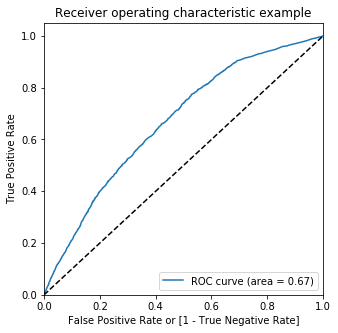

In [164]:
# ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [165]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.035077,45071,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.017191,5295,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.017191,6910,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.046932,32986,1,1,0,0,0,0,0,0,0,0,0
4,0.0,0.075537,54700,1,1,0,0,0,0,0,0,0,0,0


In [166]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.041733  1.000000  0.000000
0.1   0.1  0.944997  0.039686  0.984423
0.2   0.2  0.958267  0.000000  1.000000
0.3   0.3  0.958267  0.000000  1.000000
0.4   0.4  0.958267  0.000000  1.000000
0.5   0.5  0.958267  0.000000  1.000000
0.6   0.6  0.958267  0.000000  1.000000
0.7   0.7  0.958267  0.000000  1.000000
0.8   0.8  0.958267  0.000000  1.000000
0.9   0.9  0.958267  0.000000  1.000000


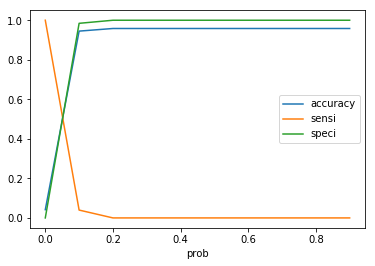

In [167]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [168]:
# Based on above plot, slected 0.06 value as cut-off
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.06 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.035077,45071,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.017191,5295,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.017191,6910,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.046932,32986,1,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.075537,54700,1,1,0,0,0,0,0,0,0,0,0,1


In [169]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8008628798102483

In [170]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[38417,  8448],
       [ 1291,   750]], dtype=int64)

In [171]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3674669279764821

In [173]:
# Let us calculate specificity
TN / float(TN+FP)

0.8197375440093887

In [174]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.05930622901902275

In [175]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7790298873101421

### Evaluating model performance on test data

In [176]:
X_test = X_test[col]
X_test.head()

,Income,No of months in current company,No of times 90 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,No of trades opened in last 12 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Total No of Trades
37031,-0.262834,-0.123015,-0.1336,-0.268936,0.368460,0.395662,0.292606,0.368403,0.332461
58016,0.054657,0.167138,-0.1336,0.710220,0.368460,0.395662,0.292606,0.368403,0.332461
5851,-0.030935,-0.073137,-0.1336,-0.268936,-0.865123,-0.453121,-0.320058,-0.828284,-0.686206
5330,-0.262834,-0.123015,-0.1336,-0.268936,-0.865123,-0.453121,-0.320058,-0.828284,-0.686206
35397,0.054657,-0.007158,-0.1336,-0.268936,0.368460,0.395662,0.292606,0.368403,0.332461


In [177]:
X_test_sm = sm.add_constant(X_test)

In [178]:
y_test_pred = res.predict(X_test_sm)

In [179]:
y_test_pred[:10]

37031    0.041882
58016    0.089436
5851     0.015830
5330     0.014400
35397    0.049044
18983    0.015288
36425    0.044390
11256    0.015693
4614     0.015638
14509    0.014473
dtype: float64

In [180]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.0418816 , 0.08943611, 0.01582998, 0.01439963, 0.04904407,
       0.01528832, 0.04438999, 0.01569293, 0.01563815, 0.01447319])

In [181]:
# Converted =1 is default, Assigned ID so that can refer application ID is needed
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Convert_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Converted,Convert_Prob,CustID
0,0.0,0.041882,37031
1,0.0,0.089436,58016
2,0.0,0.015830,5851
3,0.0,0.014400,5330
4,0.0,0.049044,35397


In [182]:
y_test_pred_final['predicted'] = y_test_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.06 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0.0,0.041882,37031,0
1,0.0,0.089436,58016,1
2,0.0,0.015830,5851,0
3,0.0,0.014400,5330,0
4,0.0,0.049044,35397,0


In [183]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
print(confusion)

[[16442  3613]
 [  577   329]]


In [184]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted))

0.8001049568245789


## Creating Scorecard

In [185]:
# Score Logic
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds/np.log(2)
offset = target_score - factor*np.log(target_odds)

In [186]:
y_train_pred_final['score'] = offset - factor*y_train_pred_final['Convert_Prob']
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,score
0,1.0,0.035077,45071,0,1,0,0,0,0,0,0,0,0,0,0,332.549323
1,0.0,0.017191,5295,0,1,0,0,0,0,0,0,0,0,0,0,333.065409
2,0.0,0.017191,6910,0,1,0,0,0,0,0,0,0,0,0,0,333.065409
3,0.0,0.046932,32986,1,1,0,0,0,0,0,0,0,0,0,0,332.207270
4,0.0,0.075537,54700,1,1,0,0,0,0,0,0,0,0,0,1,331.381892


In [187]:
y_test_pred_final['score'] = offset - factor*y_test_pred_final['Convert_Prob']
y_test_pred_final.head()

,Converted,Convert_Prob,CustID,predicted,score
0,0.0,0.041882,37031,0,332.352990
1,0.0,0.089436,58016,1,330.980857
2,0.0,0.015830,5851,0,333.104681
3,0.0,0.014400,5330,0,333.145953
4,0.0,0.049044,35397,0,332.146325


## Applying woe on rejected data (data2) to use model on it

In [188]:
transform_vars_list_data = data2.columns.difference([''])
transform_prefix_data = '' # leave this value blank if you need replace the original column values

In [189]:
transform_vars_list_data

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Education_Masters',
       'Education_Others', 'Education_Phd', 'Education_Professional',
       'Gender_M', 'Income',
       'Marital Status (at the time of application)_Single',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of months in current company', 'No of months in current residence',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last

In [190]:
for var in transform_vars_list_data:
    small_df_data = final_iv_data[final_iv_data['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df_data.MAX_VALUE,small_df_data.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            data2[transform_prefix_data + var] = data2[var].apply(lambda x: eval(replace_cmd))
        except:
            data2[transform_prefix_data + var] = data2[var].apply(lambda x: eval(replace_cmd1))

In [191]:
X_rejected = data2[col]
X_rejected.head()

,Income,No of months in current company,No of times 90 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,No of trades opened in last 12 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Total No of Trades
69600,0.289002,-0.007158,-0.133600,0.71022,0.368460,0.395662,0.292606,0.182736,0.332461
69601,0.056729,-0.007158,0.721982,0.71022,0.228321,0.395662,0.292606,0.368403,0.210317
69602,0.289002,-0.007158,0.721982,0.71022,0.228321,0.395662,-0.320058,0.182736,0.210317
69603,0.056729,-0.073137,0.721982,0.71022,0.228321,0.395662,0.292606,0.368403,0.210317
69604,0.056729,-0.073137,0.721982,0.71022,0.228321,0.395662,0.292606,0.368403,0.210317


In [192]:
X_rejected.shape

(1425, 9)

In [193]:
X_rejected_sm = sm.add_constant(X_rejected)

In [194]:
y_rejected_pred = res.predict(X_rejected_sm)

In [195]:
y_rejected_pred[:10]

69600    0.076655
69601    0.086670
69602    0.094184
69603    0.083038
69604    0.083038
69605    0.082669
69606    0.099112
69607    0.076194
69608    0.096920
69609    0.100891
dtype: float64

In [196]:
y_rejected_pred = pd.DataFrame(y_rejected_pred)

In [197]:
y_rejected_pred= y_rejected_pred.rename(columns={ 0 : 'Convert_Prob'})

In [198]:
# Score on rejected population
y_rejected_pred['score'] = offset - factor*y_rejected_pred['Convert_Prob']
y_rejected_pred.head()

,Convert_Prob,score
69600,0.076655,331.349644
69601,0.086670,331.060668
69602,0.094184,330.843848
69603,0.083038,331.165478
69604,0.083038,331.165478


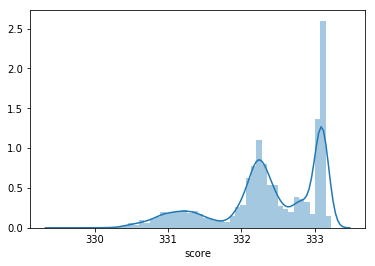

In [199]:
# Score distribution of accepted train population
sns.distplot(y_train_pred_final['score'])

<Figure size 576x576 with 0 Axes>

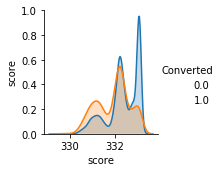

In [200]:
# Distribution of default(red color) and not default (blue color) in accepted train population
plt.figure(figsize=(8,8))
ax = sns.pairplot(y_train_pred_final,hue='Converted',vars=['score'])

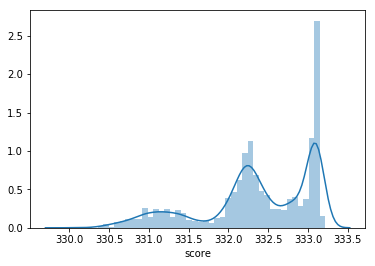

In [201]:
# Score distribution of accepted test population
sns.distplot(y_test_pred_final['score'])

<Figure size 576x576 with 0 Axes>

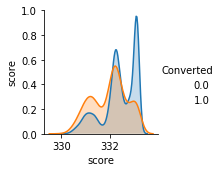

In [202]:
# Distribution of default(red color) and not default (blue color) in accepted test population
plt.figure(figsize=(8,8))
sns.pairplot(y_test_pred_final,hue='Converted',vars=['score'])

In [203]:
# Combining train and test data - Total Accepted Population
y_total_pred = pd.concat([y_train_pred_final, y_test_pred_final])

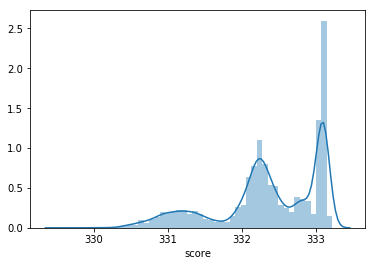

In [204]:
# Score distribution of total accepted population
sns.distplot(y_total_pred['score'])

<Figure size 576x576 with 0 Axes>

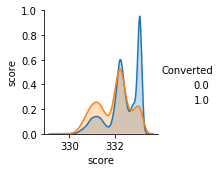

In [205]:
# Distribution of default(red color) and not default (blue color) in total accepted population
plt.figure(figsize=(8,8))
sns.pairplot(y_total_pred,hue='Converted',vars=['score'])

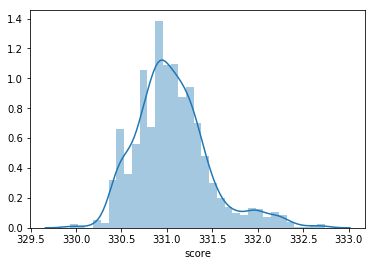

In [206]:
# Score distribution in rejected population
sns.distplot(y_rejected_pred['score'])

## Based on distribution, most of rejected population has score less than 331.7, and most of accepted population has score more than 331.7

In [207]:
# Chosing 331.7 as threshold score value
# All applicants above 332 should be accepted and below 332 should be rejected 

In [208]:
y_total_pred.shape

(69867, 16)

In [209]:
y_rejected_pred.shape

(1425, 2)

In [210]:
# Using model auto accept from accepted population
auto_accept1 = y_total_pred[y_total_pred['score'] >= 331.7]
auto_accept1.shape

(57444, 16)

In [211]:
# Default rate in auto accept population
default_cnt1 = auto_accept1[auto_accept1['Converted'] == 1]
default_cnt1.shape

(1925, 16)

In [212]:
# Default rate in auto accept population is 3.35%
default_rate1 = default_cnt1.shape[0]/auto_accept1.shape[0]
print(default_rate1*100)

3.3510897569807114


In [213]:
# Using model auto accept from rejected population
auto_accept2 = y_rejected_pred[y_rejected_pred['score'] >= 331.7]
auto_accept2.shape

(104, 2)

In [214]:
#default 

default_rej1 = y_total_pred[y_total_pred['Converted'] == 1]
default_rej1.shape

(2947, 16)

In [215]:
default_rej1.head()

,Convert_Prob,Converted,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,score
0,0.035077,1.0,45071,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332.549323
48,0.045305,1.0,31719,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332.254211
65,0.062846,1.0,56811,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,331.748092
113,0.106602,1.0,69305,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,330.485569
118,0.042875,1.0,21624,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332.324335


In [216]:

#we could have given 1925 of 2947 rejcetd people a card.
auto_accept_rej = default_rej1[default_rej1['score'] >= 331.7]
auto_accept_rej.shape

(1925, 16)

### Auto approval Rate - 80.7%

In [217]:
# Auto approval rate from total applicants is 80.7%
auto_approval_rate = (auto_accept1.shape[0] + auto_accept2.shape[0])/(y_total_pred.shape[0]+y_rejected_pred.shape[0])
print(auto_approval_rate*100)

80.721539583684


In [218]:
# Using model auto reject from accepted population
auto_reject1 = y_total_pred[y_total_pred['score'] < 331.7]
auto_reject1.shape

(12423, 16)

In [219]:
## Default rate in auto accept population
default_cnt2 = auto_reject1[auto_reject1['Converted'] == 1]
default_cnt2.shape

(1022, 16)

In [220]:
# Default rate in auto accept population is 8.23%
default_rate2 = default_cnt2.shape[0]/auto_reject1.shape[0]
print(default_rate2*100)

8.226676326169201


In [221]:
# Using model auto reject from rejected population
auto_reject2 = y_rejected_pred[y_rejected_pred['score'] < 331.7]
auto_reject2.shape

(1321, 2)

In [222]:
# Difference in default rate between model based accepted vs rejected population - 4.87%
net_benefit_dr = default_rate2 - default_rate1
print(net_benefit_dr*100)

4.87558656918849


### Amount Saved - 3.35 millio dollars

In [223]:
# Assuming 5000 dollar is average default amount per credit card
# Amount saved by using model is 3.35 million dollars
avg_default_amt = 5000
saving = (auto_reject1.shape[0] + auto_reject2.shape[0])*net_benefit_dr*avg_default_amt
print(saving)

3350503.090346331


# Other tried Models for Reference - Our Model and all other parts are above this

### Decision Tree

In [224]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [225]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [226]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred_default = dt_default.predict(X_train)

# Printing classification report
print(classification_report(y_train, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     46865
         1.0       0.00      0.00      0.00      2041

    accuracy                           0.96     48906
   macro avg       0.48      0.50      0.49     48906
weighted avg       0.92      0.96      0.94     48906



C:\Users\Deepesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [227]:
# Printing confusion matrix
print(confusion_matrix(y_train,y_pred_default))

[[46865     0]
 [ 2041     0]]


Now we will try to tune the hyperparameters
•Maximum Depth
•Minimum Samples Leaf
•Minimum Samples Split
•Criterion

We will use gridsearchCV to tune the hyperparameters


In [228]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   15.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [229]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9582668793195109
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [230]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [231]:
# accuracy score
clf_gini.score(X_train,y_train)

0.9582668793195109

In [232]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     46865
         1.0       0.00      0.00      0.00      2041

    accuracy                           0.96     48906
   macro avg       0.48      0.50      0.49     48906
weighted avg       0.92      0.96      0.94     48906



C:\Users\Deepesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [233]:
# confusion matrix
print(confusion_matrix(y_train,y_pred))

[[46865     0]
 [ 2041     0]]


### Random Forest

In [234]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [235]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [236]:
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [237]:
# predict churn on test data
y_pred = rfc.predict(X_train)

In [238]:
# Let's check the report of our default model
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     46865
         1.0       0.95      0.64      0.77      2041

    accuracy                           0.98     48906
   macro avg       0.97      0.82      0.88     48906
weighted avg       0.98      0.98      0.98     48906



In [239]:
# Printing confusion matrix
print(confusion_matrix(y_train,y_pred))

[[46790    75]
 [  725  1316]]


In [240]:
print(accuracy_score(y_train,y_pred))

0.9836420889052468


In [241]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [242]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [243]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9582668793195109 using {'max_depth': 4, 'max_features': 5, 'n_estimators': 100}


In [244]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             max_features=5,
                             n_estimators=100)

In [245]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [246]:
# predict churn on test data
y_pred = rfc.predict(X_train)